In [1]:
# Set working directory (optional during development)
import os
os.chdir('/Users/sudishmakarki/My_project2')  # only if needed
print(" Working directory:", os.getcwd())

# Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from prophet.diagnostics import cross_validation, performance_metrics
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import scipy.stats as stats

# Custom Functions
from models.data_interpolation import (
    load_data,
    preprocess_data,
    split_train_test,
    generate_time_series_splits
)

from models.model_sarimax import (
    prepare_sarimax_data,
    check_stationarity,
    plot_acf_pacf,
    fit_sarimax_model,
    analyze_residual_spike,
    ljung_box_test,
    forecast_sarimax_model,
    identify_peak_hours_sarimax,
    evaluate_sarimax_metrics,
    rolling_forecast_sarimax,
    generate_future_forecast_sarimax,
    group_forecast_by_hour,
    
)

from models.model_sarimax import (
    create_exogenous_variables,
    fit_sarimax_with_exog,
    ljung_box_test_refined_sarimax,
    analyze_largest_residual_sarimax_exog,
    forecast_with_exog,
    analyze_peak_hours_exog,
    evaluate_sarimax_exog_metrics,
    rolling_forecast_sarimax_exog,
    generate_future_forecast_sarimax_exog,
    group_forecast_by_hour_sarimax_exog
    
)

 Working directory: /Users/sudishmakarki/My_project2


In [2]:
# Custom Functions
from models.data_interpolation import (
    load_data,
    preprocess_data,
    split_train_test,
    generate_time_series_splits
)

In [3]:
# Load and preprocess
df = load_data('data/RestaurantData.csv')
df_clean = preprocess_data(df)

                     Year  Month  Season  DayOfWeek WeekDay  Hour  \
Timestamp                                                           
2018-01-01 00:00:00  2018      1  Winter          1  Monday     0   
2018-01-01 01:00:00  2018      1  Winter          1  Monday     1   
2018-01-01 02:00:00  2018      1  Winter          1  Monday     2   
2018-01-01 03:00:00  2018      1  Winter          1  Monday     3   
2018-01-01 04:00:00  2018      1  Winter          1  Monday     4   

                            Holiday Weather SpecialEvent  CustomerCount  \
Timestamp                                                                 
2018-01-01 00:00:00  New Year's Day   Rainy          NaN              6   
2018-01-01 01:00:00  New Year's Day   Windy          NaN             11   
2018-01-01 02:00:00  New Year's Day   Snowy          NaN              9   
2018-01-01 03:00:00  New Year's Day   Rainy          NaN             10   
2018-01-01 04:00:00  New Year's Day  Cloudy          NaN          

In [4]:
# Split into train and test
restaurant_train, restaurant_test = split_train_test(df_clean, split_date='2022-01-01')
# Format for SARIMAX
train_series, test_series = prepare_sarimax_data(restaurant_train, restaurant_test)

SARIMAX Exogenous Variables model refinement 2

In [5]:
# Ensure the datetime index is correctly set and frequency is hourly
restaurant_subset_train = restaurant_train.copy()
restaurant_subset_test = restaurant_test.copy()

restaurant_subset_train.index = pd.to_datetime(restaurant_subset_train.index)
restaurant_subset_train = restaurant_subset_train.asfreq('h')

restaurant_subset_test.index = pd.to_datetime(restaurant_subset_test.index)
restaurant_subset_test = restaurant_subset_test.asfreq('h')

In [6]:
# Extract exogenous variables (hour + holidays) for train and test
exog_train, exog_test = create_exogenous_variables(restaurant_subset_train, restaurant_subset_test)
exog_train.head()


,hour,Holiday_Boxing Day,Holiday_Boxing Day (observed),Holiday_Christmas Day,Holiday_Christmas Day (observed),Holiday_Good Friday,Holiday_May Day,Holiday_New Year's Day,Holiday_New Year's Day (observed),Holiday_No Holiday,Holiday_Platinum Jubilee of Elizabeth II,Holiday_Spring Bank Holiday,Holiday_State Funeral of Queen Elizabeth II
Timestamp,,,,,,,,,,,,,
2018-01-01 00:00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 01:00:00,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 02:00:00,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 03:00:00,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 04:00:00,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [7]:
'''# --- Quick Test Mode: SARIMAX with Exogenous Variables (Small Subset) ---

# Slice last 2000 rows for fast testing
small_train_series = train_series.iloc[-2000:]
small_exog_train = exog_train.iloc[-2000:]

# Define SARIMAX parameters
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 24)

# Fit model on small subset
results_exog_test = fit_sarimax_with_exog(
    small_train_series,
    small_exog_train,
    order=order,
    seasonal_order=seasonal_order
)

# Forecast 24 steps ahead using test exogenous features
exog_forecast_input = exog_test.iloc[:24]
forecast_test, forecast_ci_test = forecast_with_exog(results_exog_test, exog_forecast_input, exog_forecast_input.index)

# Preview forecast
forecast_test.head()'''

'# --- Quick Test Mode: SARIMAX with Exogenous Variables (Small Subset) ---\n\n# Slice last 2000 rows for fast testing\nsmall_train_series = train_series.iloc[-2000:]\nsmall_exog_train = exog_train.iloc[-2000:]\n\n# Define SARIMAX parameters\norder = (1, 1, 1)\nseasonal_order = (1, 1, 1, 24)\n\n# Fit model on small subset\nresults_exog_test = fit_sarimax_with_exog(\n    small_train_series,\n    small_exog_train,\n    order=order,\n    seasonal_order=seasonal_order\n)\n\n# Forecast 24 steps ahead using test exogenous features\nexog_forecast_input = exog_test.iloc[:24]\nforecast_test, forecast_ci_test = forecast_with_exog(results_exog_test, exog_forecast_input, exog_forecast_input.index)\n\n# Preview forecast\nforecast_test.head()'

In [8]:
# Fit SARIMAX model with exogenous variables
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 24)

results_exog_full = fit_sarimax_with_exog(train_series, exog_train, order=order, seasonal_order=seasonal_order)


                                     SARIMAX Results                                      
Dep. Variable:                      CustomerCount   No. Observations:                35064
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood             -113954.673
Date:                            Fri, 11 Apr 2025   AIC                         227945.346
Time:                                    10:10:22   BIC                         228097.702
Sample:                                01-01-2018   HQIC                        227993.873
                                     - 12-31-2021                                         
Covariance Type:                           robust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
hour                                            

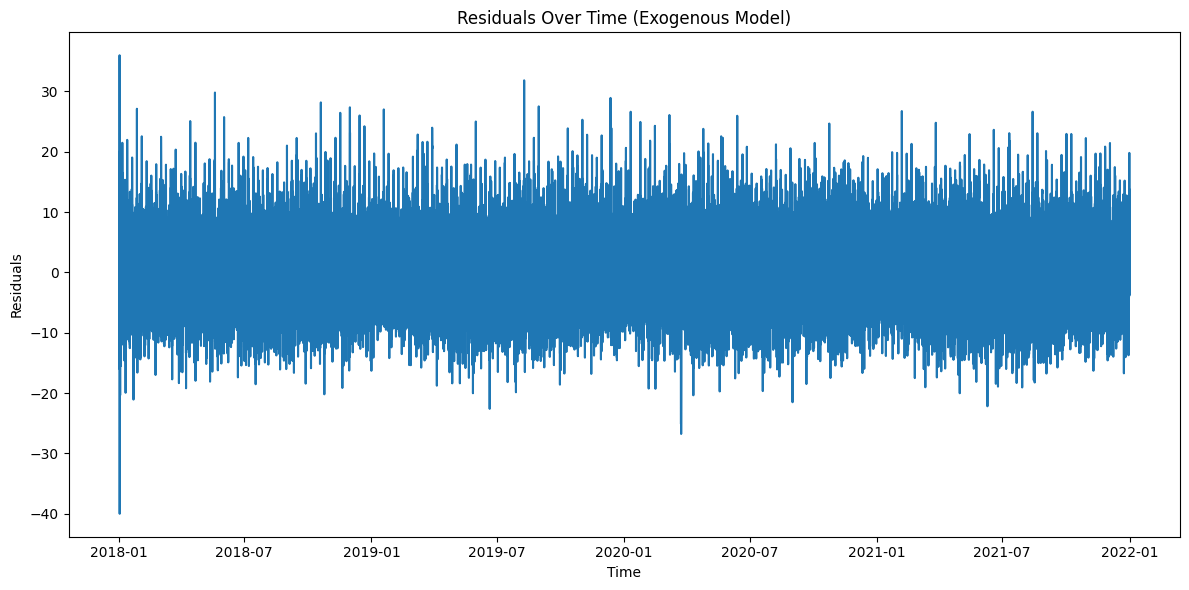

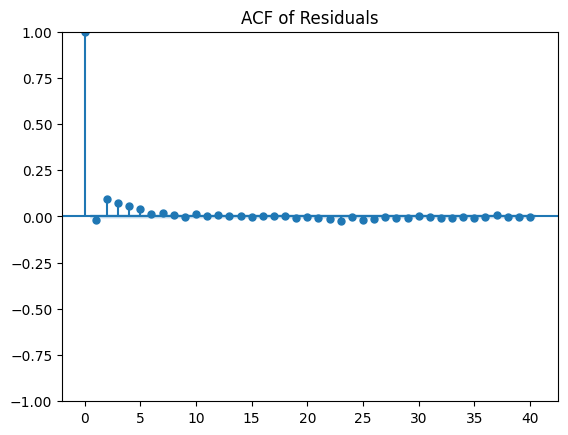

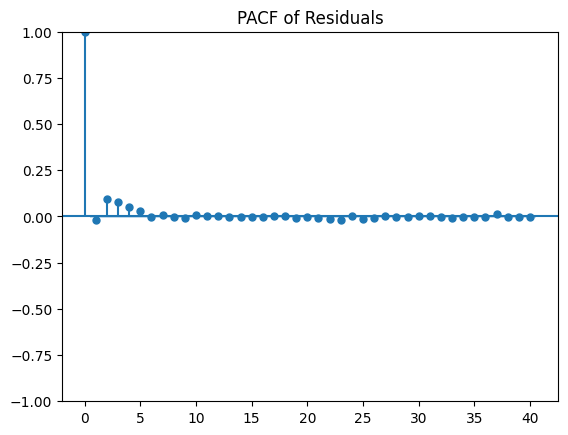

In [9]:
# Plot residuals from the exogenous model
residuals_exog = results_exog_full.resid

plt.figure(figsize=(12, 6))
plt.plot(residuals_exog)
plt.title("Residuals Over Time (Exogenous Model)")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

plot_acf(residuals_exog.dropna(), lags=40)
plt.title("ACF of Residuals")
plt.show()

plot_pacf(residuals_exog.dropna(), lags=40)
plt.title("PACF of Residuals")
plt.show()

In [10]:
#Largest Residual Check
analyze_largest_residual_sarimax_exog(residuals_exog, restaurant_subset_train)

Largest residual at: 2018-01-01 22:00:00 with value: -39.999967695319434
Data at that timestamp:
Year                       2018
Month                         1
Season                   Winter
DayOfWeek                     1
WeekDay                  Monday
Hour                         22
Holiday          New Year's Day
Weather                  Cloudy
SpecialEvent                NaN
CustomerCount                 9
Orders                        8
Revenue                  132.63
StaffingLevel                 7
Name: 2018-01-01 22:00:00, dtype: object


(Timestamp('2018-01-01 22:00:00'), np.float64(-39.999967695319434))

In [11]:
#Ljung-Box Test
ljung_box_test_refined_sarimax(residuals_exog)

Ljung-Box test results for refined model residuals:
       lb_stat      lb_pvalue
10  718.370663  7.140120e-148


,lb_stat,lb_pvalue
10,718.370663,7.140120e-148


In [12]:
# Forecasting on the Test Set with Exogenous Variables
forecast_mean_exog, forecast_ci_exog = forecast_with_exog(
    results_exog_full,
    exog_test=exog_test,
    test_index=restaurant_subset_test.index
)

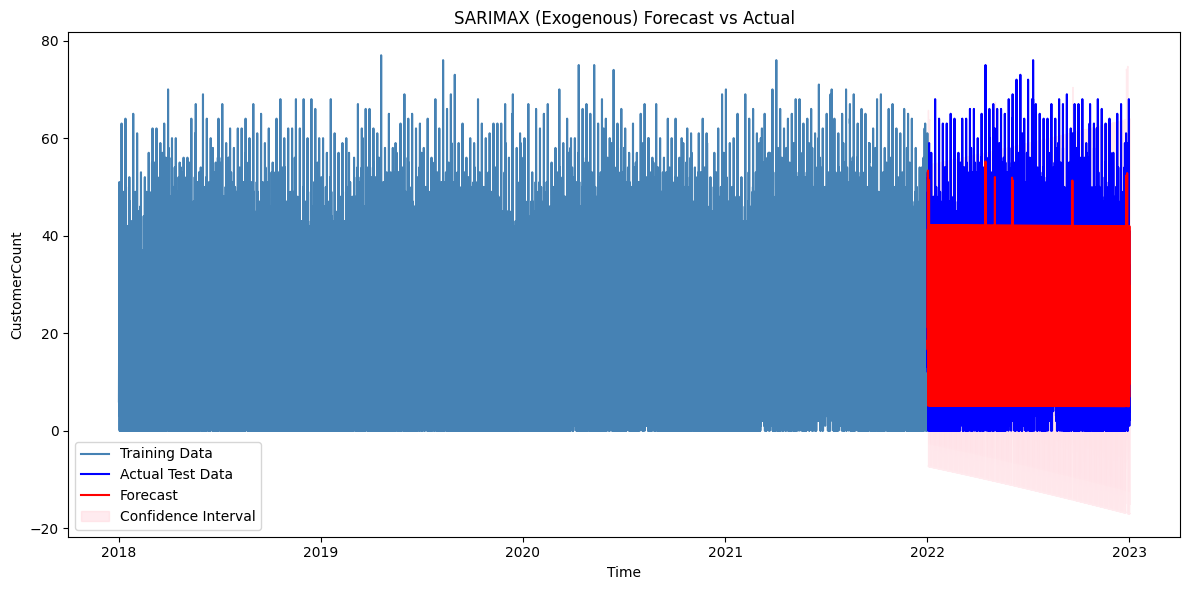

In [13]:
#Plot Forecast vs Actual
plt.figure(figsize=(12, 6))
plt.plot(train_series.index, train_series, label='Training Data', color='steelblue')
plt.plot(test_series.index, test_series, label='Actual Test Data', color='blue')
plt.plot(forecast_mean_exog.index, forecast_mean_exog, label='Forecast', color='red')
plt.fill_between(forecast_ci_exog.index,
                 forecast_ci_exog.iloc[:, 0],
                 forecast_ci_exog.iloc[:, 1],
                 color='pink', alpha=0.3, label='Confidence Interval')
plt.title("SARIMAX (Exogenous) Forecast vs Actual")
plt.xlabel("Time")
plt.ylabel("CustomerCount")
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
forecast_mean_exog_full, forecast_ci_exog_full = forecast_with_exog(
    results_exog_full,
    exog_test=exog_test,
    test_index=test_series.index
)

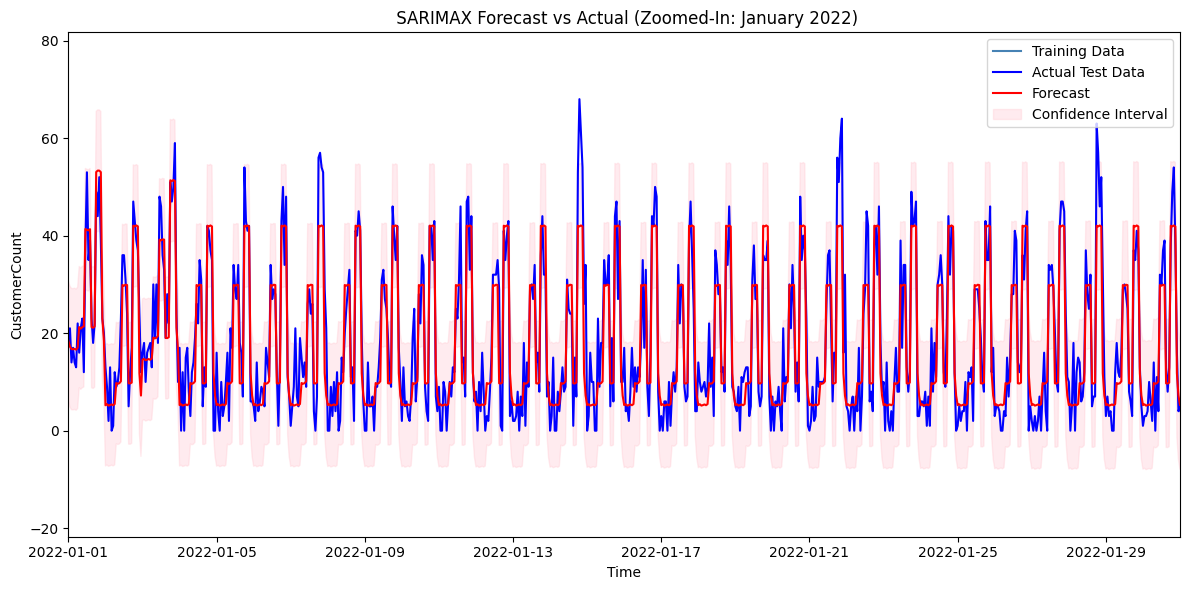

In [20]:
# --- Zoomed-In Plot for January 2022 ---
plt.figure(figsize=(12, 6))

# Plot training, actual test, and forecast
plt.plot(restaurant_subset_train.index, train_series, label='Training Data', color='steelblue')
plt.plot(restaurant_subset_test.index, test_series, label='Actual Test Data', color='blue')
plt.plot(forecast_mean_exog_full.index, forecast_mean_exog_full, label='Forecast', color='red')

# Confidence interval shading
plt.fill_between(forecast_ci_exog_full.index,
                 forecast_ci_exog_full.iloc[:, 0],
                 forecast_ci_exog_full.iloc[:, 1],
                 color='pink', alpha=0.3, label='Confidence Interval')

# Zoomed-in x-axis range (January 2022)
plt.xlim(pd.to_datetime("2022-01-01"), pd.to_datetime("2022-01-31"))

# Labels and legend
plt.title(" SARIMAX Forecast vs Actual (Zoomed-In: January 2022)")
plt.xlabel("Time")
plt.ylabel("CustomerCount")
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
#Identify Peak Hours
peak_hours_exog, threshold_exog, hourly_avg_exog, forecast_peak_exog, test_peak_exog = analyze_peak_hours_exog(
    forecast_mean_exog, test_series, threshold_ratio=0.6
)

# Optional: display hourly average
display(
    hourly_avg_exog.reset_index(name='Avg Forecast (yhat)')
    .style.set_caption("SARIMAX Exog: Hourly Avg Forecast")
    .background_gradient(cmap='Blues', subset=['Avg Forecast (yhat)'])
)

,Hour,Avg Forecast (yhat)
0,0,5.475972
1,1,5.637848
2,2,5.367953
3,3,5.473067
4,4,5.607747
5,5,5.448174
6,6,5.677016
7,7,9.990198
8,8,9.845443
9,9,9.961389


In [25]:
#Evaluate Metrics
display(evaluate_sarimax_exog_metrics(
    test_series, forecast_mean_exog, test_peak_exog, forecast_peak_exog
))

/Users/sudishmakarki/My_project2/.venv/lib/python3.10/site-packages/pandas/io/formats/style.py:3811: RuntimeWarning: invalid value encountered in scalar multiply
  norm = _matplotlib.colors.Normalize(smin - (rng * low), smax + (rng * high))


,Metric,Type,Value
0,MAE,Overall,6.137079
1,RMSE,Overall,7.847890
2,MAPE,Overall,inf
3,Modified MAPE,Overall,26279501.219865
4,SMAPE,Overall,48.871114
5,MAE,Peak Hours,6.449623
6,RMSE,Peak Hours,8.330023
7,MAPE,Peak Hours,0.160020


In [26]:
#Rolling Forecast with Exogenous Inputs
rolling_overall_metrics_exog, rolling_peak_metrics_exog, _, _, _, _ = rolling_forecast_sarimax_exog(
    train_series=train_series,
    test_series=test_series,
    exog_train=exog_train,
    exog_test=exog_test,
    best_order=order,
    best_seasonal_order=seasonal_order,
    peak_hours=peak_hours_exog
)

# Format and display
rolling_metrics_df = pd.DataFrame([
    ["MAE", "Overall", rolling_overall_metrics_exog['MAE']],
    ["RMSE", "Overall", rolling_overall_metrics_exog['RMSE']],
    ["MAPE", "Overall", rolling_overall_metrics_exog['MAPE']],
    ["MAE", "Peak Hours", rolling_peak_metrics_exog['MAE']],
    ["RMSE", "Peak Hours", rolling_peak_metrics_exog['RMSE']],
    ["MAPE", "Peak Hours", rolling_peak_metrics_exog['MAPE']],
], columns=["Metric", "Type", "Value"])

display(rolling_metrics_df.style.set_caption("Rolling Forecast Metrics (Exogenous SARIMAX)").background_gradient(cmap='Blues', subset=["Value"]))

/Users/sudishmakarki/My_project2/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sudishmakarki/My_project2/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sudishmakarki/My_project2/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,Metric,Type,Value
0,MAE,Overall,18.809981
1,RMSE,Overall,21.553503
2,MAPE,Overall,0.963177
3,MAE,Peak Hours,31.010143
4,RMSE,Peak Hours,31.045686
5,MAPE,Peak Hours,0.760331


In [27]:
 #Future Forecast (30 Days)
forecast_future_exog = generate_future_forecast_sarimax_exog(results_exog_full)

# Optional: Plot
plt.figure(figsize=(12, 6))
plt.plot(forecast_future_exog['ds'], forecast_future_exog['yhat'], label='Forecast')
plt.title("30-Day Future Forecast (SARIMAX with Exogenous)")
plt.xlabel("Date")
plt.ylabel("Forecasted CustomerCount")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

ValueError: Out-of-sample operations in a model with a regression component require additional exogenous values via the `exog` argument.

In [ ]:
#Group Forecast by Hour
future_hourly_df_exog, threshold_future_exog, future_peak_hours_exog = group_forecast_by_hour_sarimax_exog(
    forecast_future_exog, threshold_ratio=0.6
)

# Display as styled table
display(future_hourly_df_exog.style.set_caption("Future Hourly Avg Forecast (Exog)").background_gradient(cmap='Blues'))